Weighted least squares example

Static car model: velocity vs. power demand with varying measurement noise

In [257]:
using Plots
using Random
using LaTeXStrings
using LinearAlgebra

rng = Xoshiro(14588); # set random number generator seed

Set some example car paramters

In [258]:
m = 1500; # mass of car in kg
g = 9.81; # gravity in m/s^2
ρ = 1.29; # density of air in kg/m^3
A = 2.0; # frontal area of car in m^2
Cd = 0.35; # drag coefficient
Cr = 0.015; # rolling resistance coefficient
η  = 4.5; # Bearing friction coefficient in kg/s

α, β, γ = m*g*Cr, η, (ρ*A*Cd)/2; # condense parameters

Generate some ground truth data

In [259]:
v_max = 200/3.6; # max velocity in m/s
v = LinRange(0, v_max, 25) # velocity vector in m/s
P = α*v + β*v.^2 + γ*v.^3; # vector of car power in W

Set up regressor matrix and measurement vector including linearly increasing measurement noise

In [260]:
σ = 100 .+ 10 .^ (v ./ v_max) .* 1000; # standard deviation of noise over speed (power sensor detoriates with speed)
Y = P .+ randn(rng, length(P)).*σ; # add noise to the measurements 
Z = [v v.^2 v.^3]; # form regressor matrix 
R = Diagonal(σ.^2); # form meas. covariance matrix

Solve least squares problem with OLS and WLS

In [261]:
w_OLS = inv(Z'*Z)*Z'*Y; # OLS estimate
W = inv(R); # weight matrix
w_WLS = inv(Z'*W*Z)*Z'*W*Y; # WLS estimate


Plot OLS results

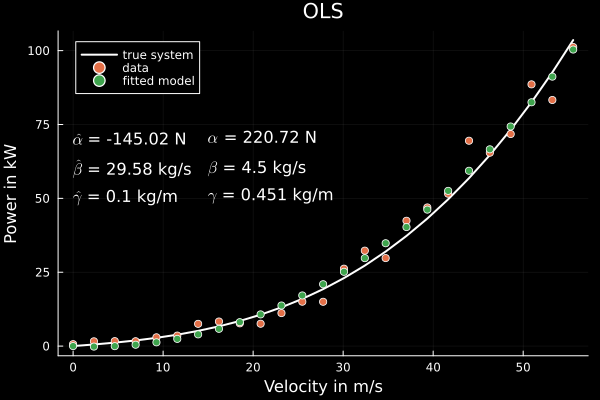

In [262]:
plot(v,Z*[α; β; γ]/1000, label="true system", 
linewidth=2, linecolor=:white, background_color="#000000",
foregroundcolourgrid=:white, grid=true,
title="OLS")
plot!(v,Y/1000,seriestype=:scatter, label="data")
plot!(v,Z*w_OLS/1000, seriestype=:scatter, label="fitted model")
xlabel!("Velocity in m/s")
ylabel!("Power in kW")

# add annotation box showing estimated parameter values
annotate!([(0, 70, text(L"$\hat{\alpha}$ = %$(round(w_OLS[1]; digits = 2)) N", 
           11, :left, :white)),
           (0, 60, text(L"$\hat{\beta}$ = %$(round(w_OLS[2]; digits = 2)) kg/s", 
           11, :left, :white)),
           (0, 50, text(L"$\hat{\gamma}$ = %$(round(w_OLS[3]; digits = 3)) kg/m", 
           11, :left, :white))])

# add annotation box showing true parameter values
annotate!([(15, 70, text(L"$\alpha$ = %$(round(α; digits = 2)) N",
           11, :left, :white)),
           (15, 60, text(L"$\beta$ = %$(round(β; digits = 2)) kg/s", 
           11, :left, :white)),
           (15, 50, text(L"$\gamma$ = %$(round(γ; digits = 3)) kg/m", 
           11, :left, :white))])

Plot WLS results

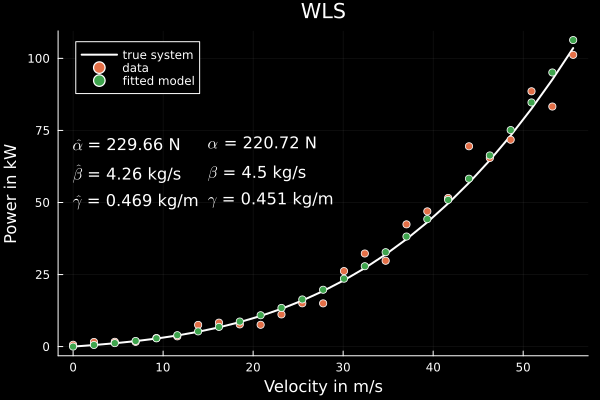

In [263]:
plot(v,Z*[α; β; γ]/1000, label="true system", 
linewidth=2, linecolor=:white, background_color="#000000",
foregroundcolourgrid=:white, grid=true,
title="WLS")
plot!(v,Y/1000,seriestype=:scatter, label="data")
plot!(v,Z*w_WLS/1000, seriestype=:scatter, label="fitted model")
xlabel!("Velocity in m/s")
ylabel!("Power in kW")

# add annotation box showing estimated parameter values
annotate!([(0, 70, text(L"$\hat{\alpha}$ = %$(round(w_WLS[1]; digits = 2)) N", 
           11, :left, :white)),
           (0, 60, text(L"$\hat{\beta}$ = %$(round(w_WLS[2]; digits = 2)) kg/s", 
           11, :left, :white)),
           (0, 50, text(L"$\hat{\gamma}$ = %$(round(w_WLS[3]; digits = 3)) kg/m", 
           11, :left, :white))])

# add annotation box showing true parameter values
annotate!([(15, 70, text(L"$\alpha$ = %$(round(α; digits = 2)) N",
           11, :left, :white)),
           (15, 60, text(L"$\beta$ = %$(round(β; digits = 2)) kg/s", 
           11, :left, :white)),
           (15, 50, text(L"$\gamma$ = %$(round(γ; digits = 3)) kg/m", 
           11, :left, :white))])

Calculate 2-norm error of OLS and WLS vs. noise-free ground truth data

In [264]:
println("OLS error (normalized): ", norm(P-Z*w_OLS)/length(P))
println("WLS error (normalized): ", norm(P-Z*w_WLS)/length(P))


OLS error (normalized): 365.74275819094873
WLS error (normalized): 226.57673263522017
